In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit as cf

In [2]:
def f(x,m,c):
    return m*x+c

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/astroclubiitk/computational-astrophysics/main/Final-Project/Pleiades_Cluster.csv")
teff=np.asarray(df['teff_val'])
lum=np.asarray(df['lum_val'])
d=1000/(np.asarray(df['plx']))
gmag=np.asarray(df['gmag'])
r=np.asarray(df['radius_val'])
df.head()

,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val
0,15.684173,58.452096,23.485778,3.486630,2.192428,0.062333,3797.0000,0.576938
1,7.498167,55.930096,25.080502,8.027063,0.188913,NaN,8337.3330,NaN
2,16.102013,57.170842,23.237979,8.509836,3.116683,NaN,3838.1667,NaN
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230
4,16.454210,55.865759,24.270604,2.675075,2.346289,0.050944,3830.0100,0.512623


In [4]:
M=gmag-5*(np.log10(d)-1)

In [5]:
color=np.asarray(df['bp_rp'].dropna())

In [6]:
T_k=5601/((color+0.4)**(2/3))
for i,ele in enumerate(T_k):
    if np.isnan(ele)==1:
        print(i)

        
        
        
T_k = T_k[~np.isnan(T_k)]

79


<ipython-input-6-29e5ce003d34>:1: RuntimeWarning: invalid value encountered in power
  T_k=5601/((color+0.4)**(2/3))


In [7]:
index=list()
for i,ele in enumerate(teff):
    if np.isnan(ele)==0 and i<970:
        index.append(i)
        
T_k_clean=T_k[index]

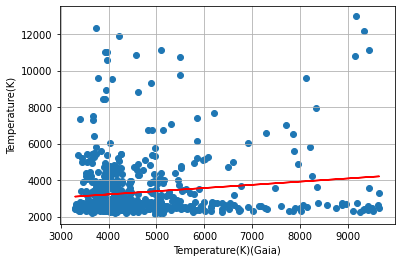

In [8]:
teff_clean=np.asarray(df['teff_val'].dropna())
teff_clean_2=teff_clean[range(0,673)]
p_opt1,p_cov1=cf(f,teff_clean_2,T_k_clean)
plt.scatter(teff_clean_2,T_k_clean)
plt.plot(teff_clean_2,f(teff_clean_2,*p_opt1),c='r')
plt.xlabel("Temperature(K)(Gaia)")
plt.ylabel("Temperature(K)")
plt.grid()

In [9]:
L=10**((0.4)*(4.77-M))

In [10]:
index2=list()
for i,ele in enumerate(lum):
    if np.isnan(ele)==0:
        index2.append(i)

L_clean=L[index2]

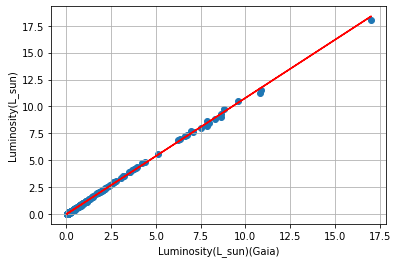

In [11]:
lum_clean=np.asarray(df['lum_val'].dropna())
plt.scatter(lum_clean,L_clean)
p_opt2,p_cov2=cf(f,lum_clean,L_clean)
plt.plot(lum_clean,f(lum_clean,*p_opt2),c='r')
plt.xlabel("Luminosity(L_sun)(Gaia)")
plt.ylabel("Luminosity(L_sun)")
plt.grid()

In [12]:
index3=list()
for i,ele in enumerate(r):
    if np.isnan(ele)==0 and i<971:
        index3.append(i)


In [13]:
r_clean=np.asarray(df['radius_val'].dropna())
r_clean_fin=r_clean[range(0,296)]

In [14]:
T_k_fin=T_k[index3]
L_fin=L[index3]

In [15]:
R=((5800**2)*L_fin**(1/2))/(T_k_fin**(2))

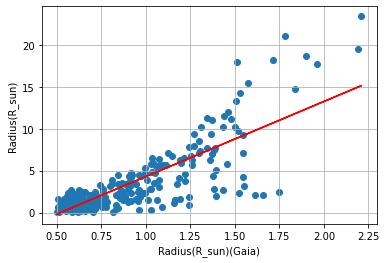

In [16]:
plt.scatter(r_clean_fin,R)
p_opt3,p_cov3=cf(f,r_clean_fin,R)
plt.plot(r_clean_fin,f(r_clean_fin,*p_opt3),c='r')
plt.xlabel("Radius(R_sun)(Gaia)")
plt.ylabel("Radius(R_sun)")
plt.grid()